Loan Approval Prediction using Machine Learning

In [11]:
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

data = pd.read_csv("LoanApprovalPrediction.csv")
print(data.head())
data

    Loan_ID Gender Married  Dependents     Education Self_Employed  \
0  LP001002   Male      No         0.0      Graduate            No   
1  LP001003   Male     Yes         1.0      Graduate            No   
2  LP001005   Male     Yes         0.0      Graduate           Yes   
3  LP001006   Male     Yes         0.0  Not Graduate            No   
4  LP001008   Male      No         0.0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
594,LP002979,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
595,LP002983,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
596,LP002984,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            598 non-null    object 
 1   Gender             598 non-null    object 
 2   Married            598 non-null    object 
 3   Dependents         586 non-null    float64
 4   Education          598 non-null    object 
 5   Self_Employed      598 non-null    object 
 6   ApplicantIncome    598 non-null    int64  
 7   CoapplicantIncome  598 non-null    float64
 8   LoanAmount         577 non-null    float64
 9   Loan_Amount_Term   584 non-null    float64
 10  Credit_History     549 non-null    float64
 11  Property_Area      598 non-null    object 
 12  Loan_Status        598 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 60.9+ KB


In [13]:
data = data.drop('Loan_ID', axis=1)
data.isnull().sum()
print(data.describe())

       Dependents  ApplicantIncome  CoapplicantIncome  LoanAmount  \
count  586.000000       598.000000         598.000000  577.000000   
mean     0.755973      5292.252508        1631.499866  144.968804   
std      1.007751      5807.265364        2953.315785   82.704182   
min      0.000000       150.000000           0.000000    9.000000   
25%      0.000000      2877.500000           0.000000  100.000000   
50%      0.000000      3806.000000        1211.500000  127.000000   
75%      1.750000      5746.000000        2324.000000  167.000000   
max      3.000000     81000.000000       41667.000000  650.000000   

       Loan_Amount_Term  Credit_History  
count        584.000000      549.000000  
mean         341.917808        0.843352  
std           65.205994        0.363800  
min           12.000000        0.000000  
25%          360.000000        1.000000  
50%          360.000000        1.000000  
75%          360.000000        1.000000  
max          480.000000        1.000000  


In [14]:
# Fill missing values in categorical columns with mode
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['Married'] = data['Married'].fillna(data['Married'].mode()[0])
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

# Fill missing values in LoanAmount with the median
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].median())

# Fill missing values in Loan_Amount_Term with the mode
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0])

# Fill missing values in Credit_History with the mode
data['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

EDA

Distribution of loan status column

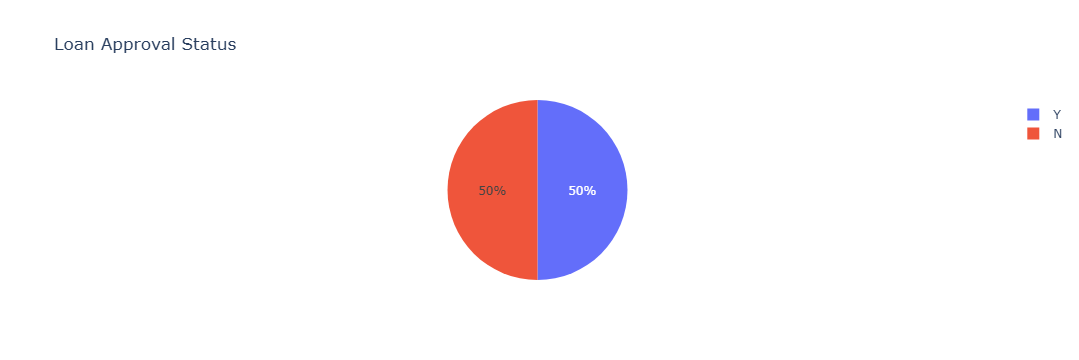

In [15]:
loan_status_count = data['Loan_Status'].value_counts()
fig_loan_status = px.pie(loan_status_count, names=loan_status_count.index,title='Loan Approval Status')
fig_loan_status.show()

Distribution of gender column

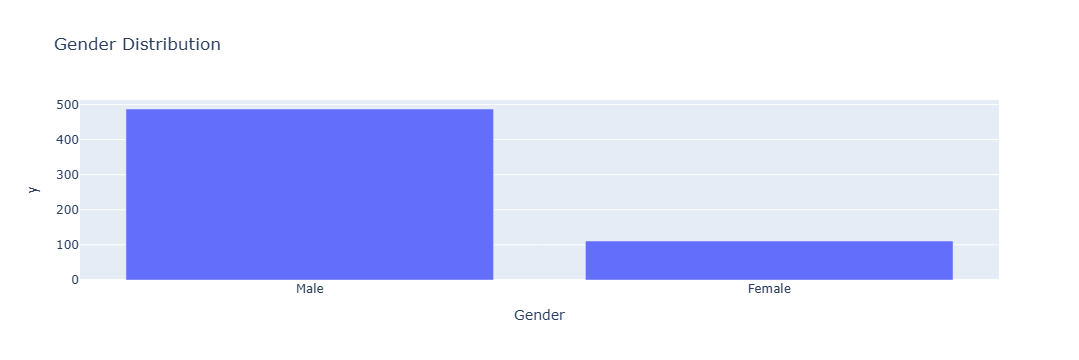

In [16]:
gender_count = data['Gender'].value_counts()
fig_gender = px.bar(gender_count, x=gender_count.index, y=gender_count.values, title='Gender Distribution')
fig_gender.show()

Distribution of Marital Status column

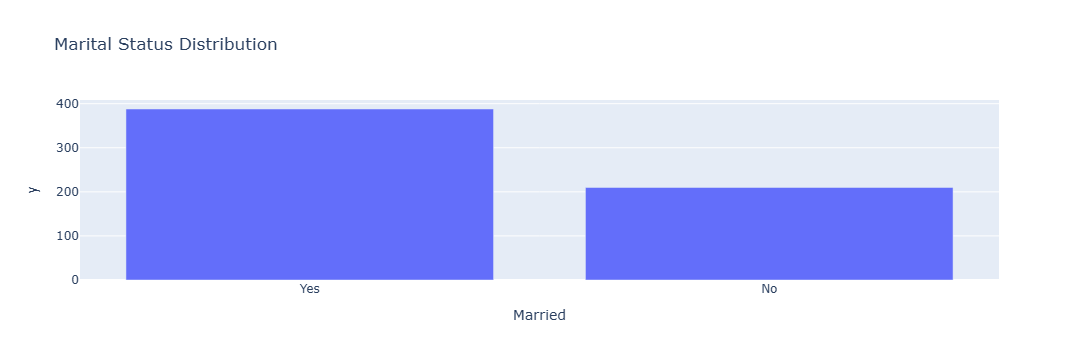

In [17]:
married_count = data['Married'].value_counts()
fig_married = px.bar(married_count, x=married_count.index, y=married_count.values, title='Marital Status Distribution')
fig_married.show()

Distribution of Education Column

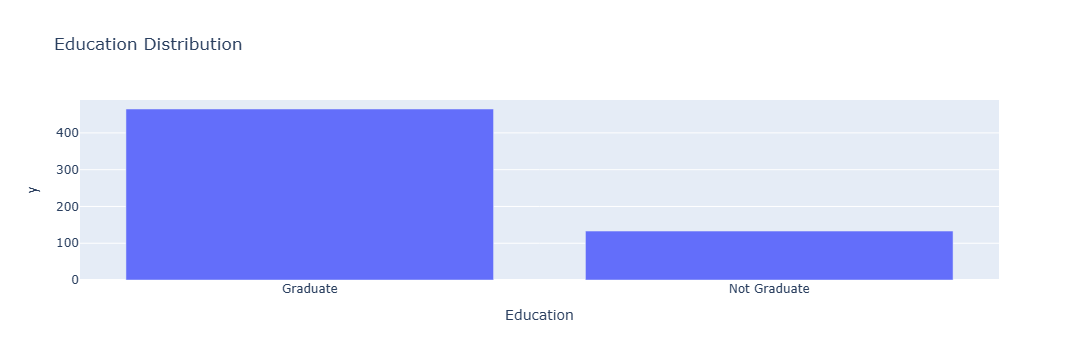

In [18]:
education_count = data['Education'].value_counts()
fig_education = px.bar(education_count, x=education_count.index, y=education_count.values, title='Education Distribution')
fig_education.show()

Distribution of the self-employment column

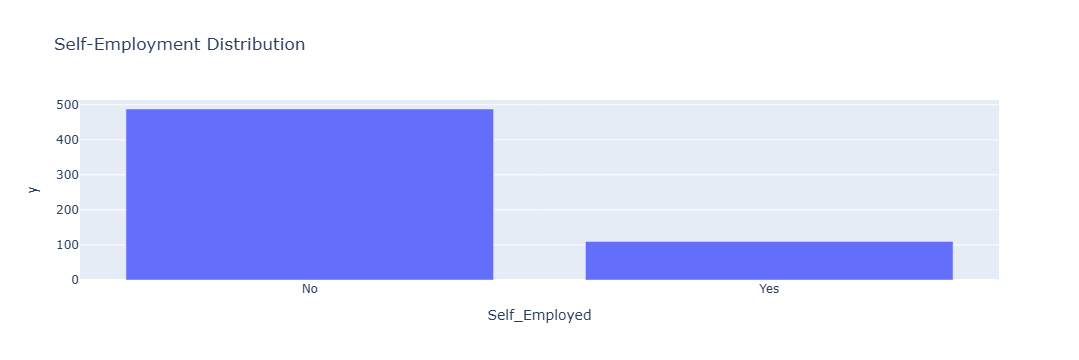

In [19]:
self_employed_count = data['Self_Employed'].value_counts()
fig_self_employed = px.bar(self_employed_count, x=self_employed_count.index, y=self_employed_count.values, title='Self-Employment Distribution')
fig_self_employed.show()

Distribution of the Applicant Income column:

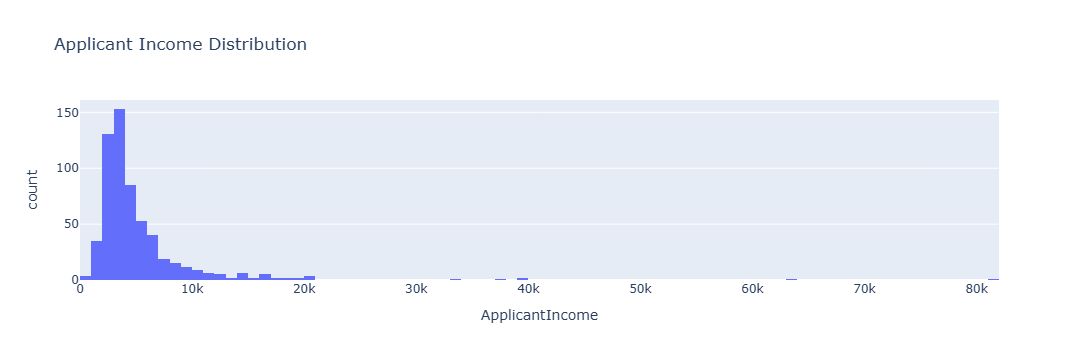

In [20]:
fig_applicant_income = px.histogram(data, x='ApplicantIncome', title='Applicant Income Distribution')
fig_applicant_income.show()

Relationship between the income of the loan applicant and the loan status

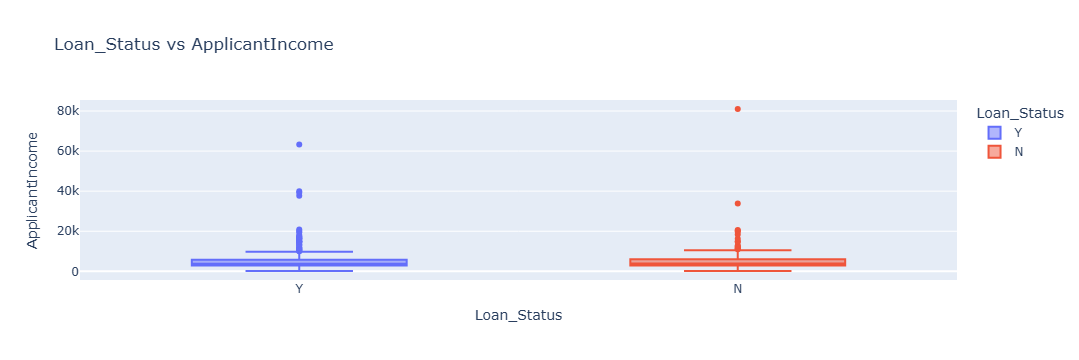

In [21]:
fig_income = px.box(data, x='Loan_Status', y='ApplicantIncome',color="Loan_Status", title='Loan_Status vs ApplicantIncome')
fig_income.show()

The “ApplicantIncome” column contains outliers which need to be removed before moving further

In [22]:
# Calculate the IQR
Q1 = df['ApplicantIncome'].quantile(0.25)
Q3 = df['ApplicantIncome'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
data = data[(data['ApplicantIncome'] >= lower_bound) & (data['ApplicantIncome'] <= upper_bound)]

Now let’s have a look at the relationship between the income of the loan co-applicant and the loan status:

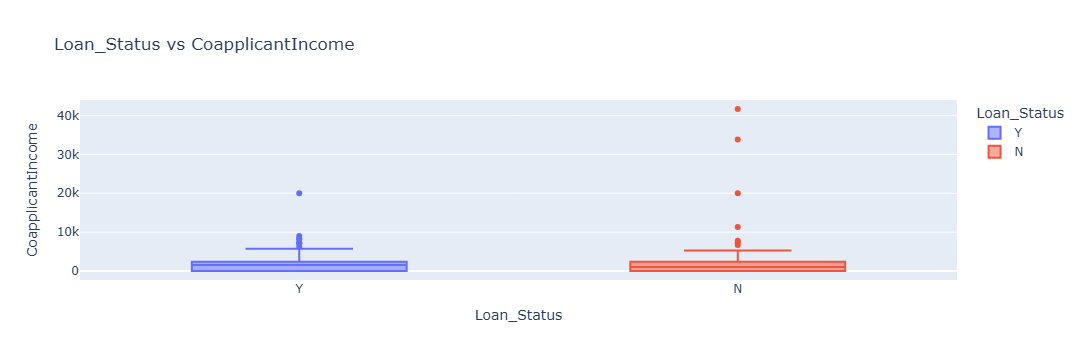

In [23]:
fig_coapplicant_income = px.box(data, x='Loan_Status', y='CoapplicantIncome',color="Loan_Status", title='Loan_Status vs CoapplicantIncome')
fig_coapplicant_income.show()

The income of the loan co-applicant also contains outliers and need to remove the outliers from this column as well:

In [24]:
# Calculate the IQR
Q1 = df['CoapplicantIncome'].quantile(0.25)
Q3 = df['CoapplicantIncome'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
data = data[(data['CoapplicantIncome'] >= lower_bound) & (data['CoapplicantIncome'] <= upper_bound)]

relationship between the loan amount and the loan status:

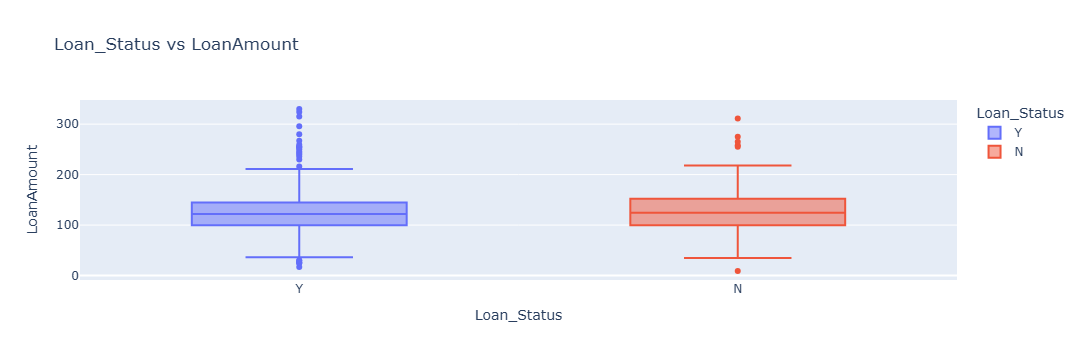

In [25]:
fig_loan_amount = px.box(data, x='Loan_Status', y='LoanAmount', color="Loan_Status",title='Loan_Status vs LoanAmount')
fig_loan_amount.show()

relationship between credit history and loan status:

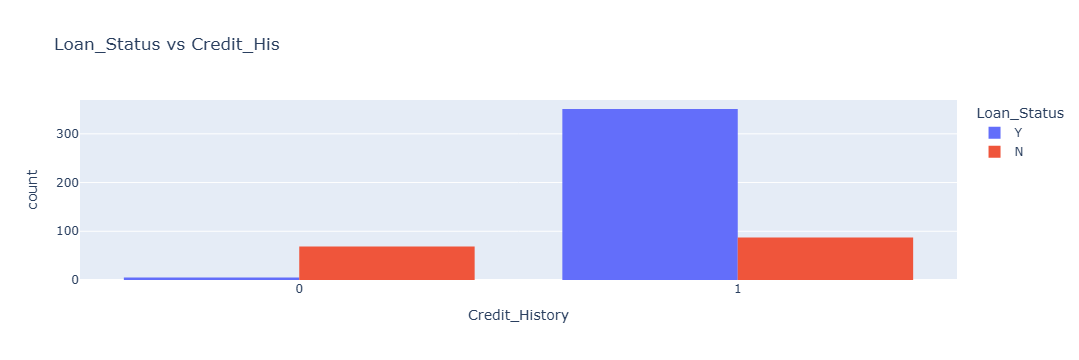

In [26]:
fig_credit_history = px.histogram(data, x='Credit_History', color='Loan_Status', barmode='group',title='Loan_Status vs Credit_His')
fig_credit_history.show()

relationship between the property area and the loan status:

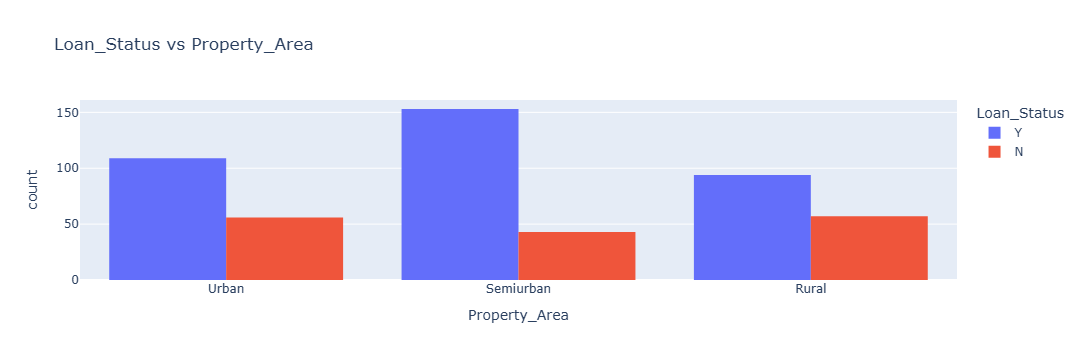

In [27]:
fig_property_area = px.histogram(data, x='Property_Area', color='Loan_Status', barmode='group',title='Loan_Status vs Property_Area')
fig_property_area.show()

Data Preparation and Training Loan Approval Prediction Model
In this step, we will:
convert categorical columns into numerical ones;
split the data into training and test sets;
scale the numerical features;
train the loan approval prediction model.

In [28]:
# Convert categorical columns to numerical using one-hot encoding
cat_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
data = pd.get_dummies(data, columns=cat_cols)

# Split the dataset into features (X) and target (y)
X = data.drop('Loan_Status', axis=1)
y = data['Loan_Status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the numerical columns using StandardScaler
scaler = StandardScaler()
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

from sklearn.svm import SVC
model = SVC(random_state=42)
model.fit(X_train, y_train)

SVC(random_state=42)

In [29]:
y_pred = model.predict(X_test)
print(y_pred)

['Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y'
 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y']


adding the predicted loan approval values to the testing set as a new column in a DataFrame called X_test_df and show the predicted loan approval values alongside the original features:

In [33]:
# Convert X_test to a DataFrame
X_test_data = pd.DataFrame(X_test, columns=X_test.columns)

# Add the predicted values to X_test_df
X_test_data['Loan_Status_Predicted'] = y_pred
print(X_test_data.head())
X_test_data.head()

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
354         0.491080           0.739933    0.049338          0.257885   
577        -0.066921           1.426420    0.291732         -2.469911   
514         0.826131           0.098880    0.675522          0.257885   
182        -1.119672          -0.916298   -1.243428         -0.651381   
580         1.513769          -0.206383    1.200708          0.257885   

     Credit_History  Gender_Female  Gender_Male  Married_No  Married_Yes  \
354        0.422699          False         True       False         True   
577        0.422699          False         True       False         True   
514       -2.365750          False         True       False         True   
182       -2.365750          False         True       False         True   
580        0.422699          False         True       False         True   

     Dependents_0.0  ...  Dependents_2.0  Dependents_3.0  Education_Graduate  \
354            True  ...

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0.0,...,Dependents_2.0,Dependents_3.0,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Predicted
354,0.491080,0.739933,0.049338,0.257885,0.422699,False,True,False,True,True,...,False,False,True,False,True,False,False,False,True,Y
577,-0.066921,1.426420,0.291732,-2.469911,0.422699,False,True,False,True,True,...,False,False,True,False,True,False,True,False,False,Y
514,0.826131,0.098880,0.675522,0.257885,-2.365750,False,True,False,True,False,...,False,False,False,True,True,False,False,True,False,N
182,-1.119672,-0.916298,-1.243428,-0.651381,-2.365750,False,True,False,True,False,...,False,False,True,False,False,True,True,False,False,N
580,1.513769,-0.206383,1.200708,0.257885,0.422699,False,True,False,True,False,...,True,False,False,True,False,True,True,False,False,Y


Summary:
Loan approval prediction involves the analysis of various factors, such as the applicant’s financial history, income, credit rating, employment status, and other relevant attributes.
By leveraging historical loan data and applying machine learning algorithms, businesses can build models to determine loan approvals for new applicants